In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from feature_engine.imputation import MeanMedianImputer

from feature_engine.imputation import (
    ArbitraryNumberImputer,
    MeanMedianImputer,
    CategoricalImputer,
)

In [411]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [412]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [414]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [415]:
df.describe(include=["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [416]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [417]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [418]:
vars_to_impute = [var for var in df.columns if df[var].isnull().sum() > 0]

vars_to_impute

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [419]:
numeric_col=df[vars_to_impute].select_dtypes(include=["int64","float64"]).columns

In [420]:
numeric_col

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [421]:
string_col=[c for c in vars_to_impute if c not in numeric_col]

In [422]:
string_col

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

<h2>Using Basic Imputation

In [423]:
df2=df.copy()

In [424]:
X_train1=df2.iloc[: , :-1]
y_train1= df2.iloc[:, -1]

In [425]:
X_test1=test.copy()

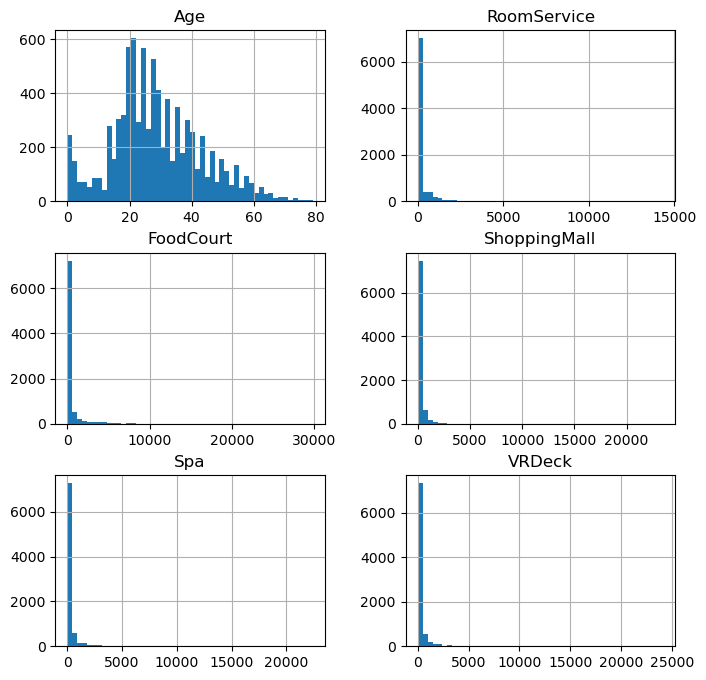

In [426]:
X_train1.hist(bins=50, figsize=(8, 8))
plt.show()
#every data plot is howing it is skewed so we will use median to fill missing values

In [427]:
imputation_dict = X_train1[numeric_col].median().to_dict()

imputation_dict

{'Age': 27.0,
 'RoomService': 0.0,
 'FoodCourt': 0.0,
 'ShoppingMall': 0.0,
 'Spa': 0.0,
 'VRDeck': 0.0}

In [428]:
X_train1.fillna(imputation_dict, inplace=True)
X_test1.fillna(imputation_dict, inplace=True)

In [429]:
X_train1.describe(include="O")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [430]:
imputation_dict2 = {
    "Name": "missing",
    "Cabin":"missing"
}

In [431]:
X_train1.fillna(imputation_dict2, inplace=True)
X_test1.fillna(imputation_dict2, inplace=True)

In [432]:
imputation_dict3 = X_train1[['HomePlanet', 'CryoSleep','Destination', 'VIP']].mode().iloc[0].to_dict()

imputation_dict3

{'HomePlanet': 'Earth',
 'CryoSleep': False,
 'Destination': 'TRAPPIST-1e',
 'VIP': False}

In [433]:
X_train1.fillna(imputation_dict3, inplace=True)
X_test1.fillna(imputation_dict3, inplace=True)

In [434]:
X_train1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [435]:
X_train1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [436]:
X_test1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

<h2> Imputation using scikitlearn

In [437]:
df3=df.copy()

In [438]:
X_train2=df3.iloc[: , :-1]
y_train2= df3.iloc[:, -1]

In [439]:
X_test2=test.copy()

In [440]:
X_train2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [441]:
X_train2.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [442]:
X_test2.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [443]:
imputer = ColumnTransformer(
        transformers=[
        (
            "",
            SimpleImputer(strategy="median"),
            numeric_col,
        ),
        (
            " ",
            SimpleImputer(strategy="most_frequent"),
            ['HomePlanet', 'CryoSleep','Destination', 'VIP'],
        ),
         (
            "  ",
            SimpleImputer(strategy="constant", fill_value="missing"),
            ["Name","Cabin"],
        ),
    ],
    remainder="passthrough",
)

In [444]:
imputer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('', SimpleImputer(strategy='median'),
                                 Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                (' ', SimpleImputer(strategy='most_frequent'),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP']),
                                ('  ',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['Name', 'Cabin'])])

In [445]:
imputer.fit(X_train2)

ColumnTransformer(remainder='passthrough',
                  transformers=[('', SimpleImputer(strategy='median'),
                                 Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                (' ', SimpleImputer(strategy='most_frequent'),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP']),
                                ('  ',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['Name', 'Cabin'])])

In [446]:
imputer.named_transformers_[""].statistics_

array([27.,  0.,  0.,  0.,  0.,  0.])

In [447]:
imputer.named_transformers_[" "].statistics_

array(['Earth', False, 'TRAPPIST-1e', False], dtype=object)

In [448]:
imputer.named_transformers_["  "].statistics_

array(['missing', 'missing'], dtype=object)

In [449]:
X_train2=imputer.transform(X_train2)

In [450]:
X_test2= imputer.transform(X_test2)

In [451]:
X_train2.isnull().sum()

__Age                     0
__RoomService             0
__FoodCourt               0
__ShoppingMall            0
__Spa                     0
__VRDeck                  0
 __HomePlanet             0
 __CryoSleep              0
 __Destination            0
 __VIP                    0
  __Name                  0
  __Cabin                 0
remainder__PassengerId    0
dtype: int64

In [452]:
X_test2.isnull().sum()

__Age                     0
__RoomService             0
__FoodCourt               0
__ShoppingMall            0
__Spa                     0
__VRDeck                  0
 __HomePlanet             0
 __CryoSleep              0
 __Destination            0
 __VIP                    0
  __Name                  0
  __Cabin                 0
remainder__PassengerId    0
dtype: int64

<h2>FEATURE-ENGINE

In [453]:
df4=df.copy()

In [454]:
X_train3=df4.iloc[: , :-1]
y_train3= df4.iloc[:, -1]

In [455]:
X_test3=test.copy()

In [456]:
pipe = Pipeline(
    [
        # missing indicator
        ("missing_ind", CategoricalImputer(variables=["Name","Cabin"])),
        # mode imputation
        (
            "imputer_mode",
            CategoricalImputer(
                imputation_method="frequent", variables=['HomePlanet', 'CryoSleep','Destination', 'VIP'],
                ignore_format=True
            ),
        ),
        # median imputation
        (
            "imputer_median",
            MeanMedianImputer(
                imputation_method="median",
                variables=numeric_col.values.tolist(),
            ),
        ),
    ]
)

In [457]:
pipe.fit(X_train3)

Pipeline(steps=[('missing_ind',
                 CategoricalImputer(variables=['Name', 'Cabin'])),
                ('imputer_mode',
                 CategoricalImputer(ignore_format=True,
                                    imputation_method='frequent',
                                    variables=['HomePlanet', 'CryoSleep',
                                               'Destination', 'VIP'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['Age', 'RoomService', 'FoodCourt',
                                              'ShoppingMall', 'Spa',
                                              'VRDeck']))])

In [458]:
pipe.named_steps["imputer_median"].imputer_dict_

{'Age': 27.0,
 'RoomService': 0.0,
 'FoodCourt': 0.0,
 'ShoppingMall': 0.0,
 'Spa': 0.0,
 'VRDeck': 0.0}

In [459]:
pipe.named_steps["imputer_mode"].imputer_dict_

{'HomePlanet': 'Earth',
 'CryoSleep': False,
 'Destination': 'TRAPPIST-1e',
 'VIP': False}

In [460]:
pipe.named_steps["missing_ind"].variables_

['Name', 'Cabin']

In [461]:
X_train3 = pipe.transform(X_train3)
X_test3 = pipe.transform(X_test3)

In [474]:
X_train1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [476]:
X_train2.isnull().sum() 

__Age                     0
__RoomService             0
__FoodCourt               0
__ShoppingMall            0
__Spa                     0
__VRDeck                  0
 __HomePlanet             0
 __CryoSleep              0
 __Destination            0
 __VIP                    0
  __Name                  0
  __Cabin                 0
remainder__PassengerId    0
dtype: int64

In [477]:
X_train3.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [478]:
X_test1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [479]:
X_test2.isnull().sum()

__Age                     0
__RoomService             0
__FoodCourt               0
__ShoppingMall            0
__Spa                     0
__VRDeck                  0
 __HomePlanet             0
 __CryoSleep              0
 __Destination            0
 __VIP                    0
  __Name                  0
  __Cabin                 0
remainder__PassengerId    0
dtype: int64

In [480]:
X_test3.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64